In [1]:
import nbsetup
from models.sparc.result import Result

In [2]:
standard = Result()

,iden,check,r2,rslope,rstderr,rintercept
0,V,rel_R,0.404946,-0.693520,0.017526,1.822563
1,V,Fnulled,0.500924,0.242207,0.005040,0.768613
2,V,mhi_R,0.161759,-0.242178,0.011493,1.585460
3,V,R,0.622433,-0.532990,0.008654,1.932889
4,V,D,0.016588,-0.089676,0.014394,1.603480
5,V,MHI,0.062148,-0.124327,0.010068,1.557352
6,W,rel_R,0.393085,-0.669078,0.017332,1.807580
7,W,Fnulled,0.495714,0.235934,0.004961,0.783940
8,W,mhi_R,0.164647,-0.239249,0.011234,1.580806
9,W,R,0.596633,-0.510974,0.008759,1.911394


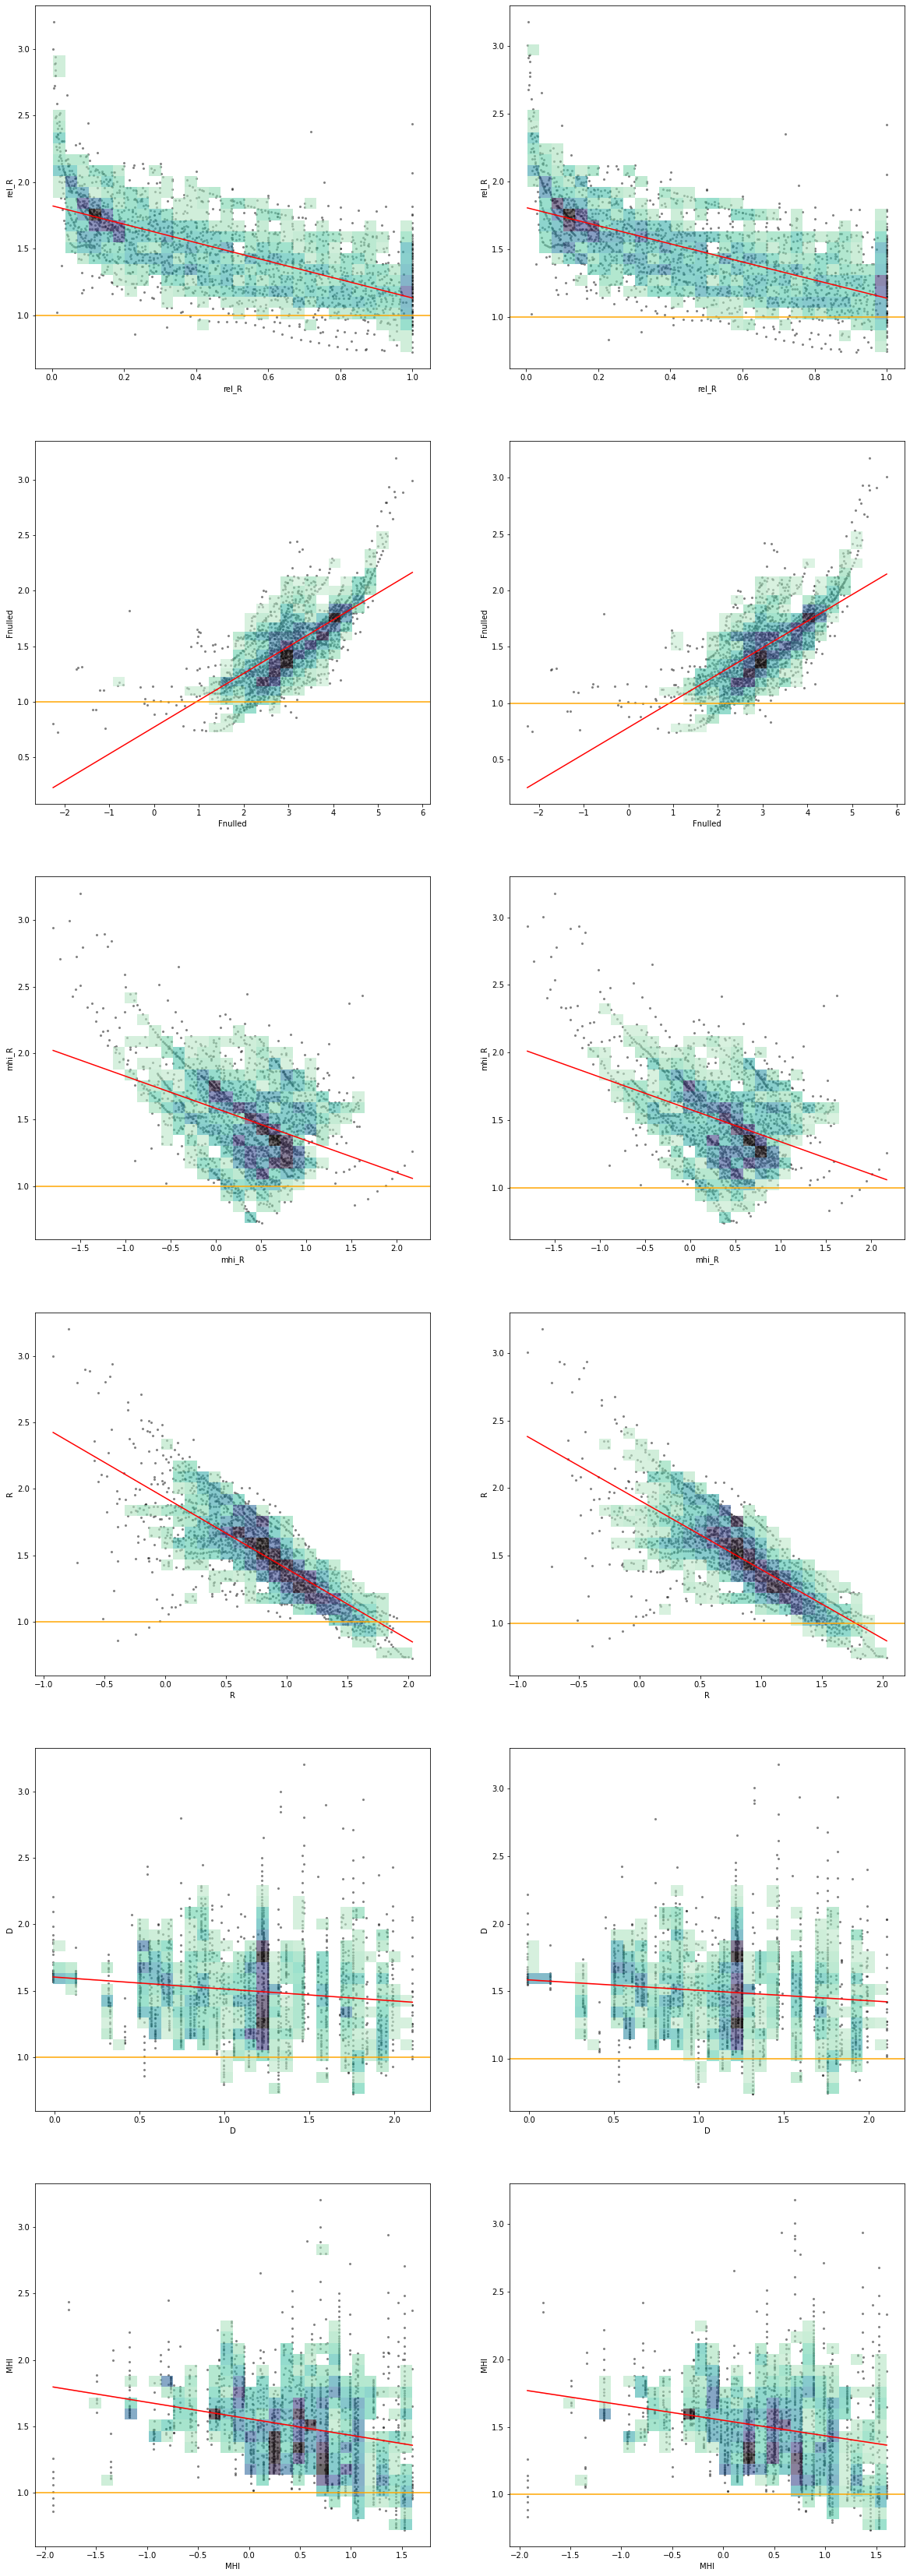

In [3]:
standard.plot_residuals()